# HW01
# Student: Pravilov Mikhail

In [2]:
import numpy as np
global_random_seed = 4526
np.random.seed(global_random_seed)
dataset_root="../Datasets/"

# VC-theory

1. (2 points) Identify breakpoints, VC-dimensions and growth functions of following hypotheses:

a) $h(x) = +1$ if $x_i > a$ 

b) $h(x) = +1$ if $a < x_i < b$

Solution: 

breakpoint: $min(k: m_H(k) < 2^k)$

$d_{VC}(H)$ = breakpoint - 1

$m_H(k) = max_{C:|C|=k}(|H_C|)$ where $H_C = \{(h(x_1), ..., h(x_k)) | h \in H, x_i \in C\}$

# a)

Let's take k = 1 then $H_C = \{(-1), (1)\}$ for any $C$. $2 < 2^1$, false

Let's take k = 2 then we have two points in C, let's call them $x_1$ and $x_2$ and assume $x_1 < x_2$

And there are three cases that produce three pairs. Let's just look at real line possible positions (1):

$x_1 < x_2 \leq a$ -> $(-1, -1)$

$x_1 \leq a < x_2$ -> $(-1, 1)$

$a < x_1 < x_2$ -> $(1, 1)$

It is all possible location on the real line and that is why (1, -1) pair is not possible.

So max power of $H_C$ is 3. And $3 < 2^2 = 4$ => breakpoint = 2

As we know, $d_{VC}(H)$ = breakpoint - 1 = 1

And growth function $m_H(k) = k + 1$. To understand it we can do the following like in (1). $a$ (letter from $x_i > a$ expression) can be located in one of k points $x_i$ and to the left of all points. That is why it equals $k + 1$.

# b)
Let's directly start with calculation of $m_H(k)$. 

We have points: $x_1 < x_2 < ... < x_k$

First $b$ can be located greater then $x_k$: $x_1 < x_2 < ... < x_k < b$. Then let's iterate $a$ on $x_i$, starting with some $a_0 < x_1$ (i.e. $a \in A_k = \{a_0, x_1, x_2, ..., x_{k}\}$, where $A_i = \{a_0, ..., x_{i}\}$)

Notice that $|A_i| = i + 1$.

For $A_k$ case we got these series:

$a_0$: (1, 1, ..., 1)

$x_1$: (-1, 1, ..., 1)

...

$x_{k-1}$: (-1, ..., -1, 1)

$x_{k}$: (-1, ..., -1, -1)

So plus k + 1 to the answer. Then let's take a look at $b = x_k$ and $A_{k-1}$.

$a_0$: (1, ..., -1)

...

$x_{k - 2}$: (-1, -1, ..., -1, 1, -1)

$x_{k - 1}$: (-1, -1, ..., -1, -1), but it was already

So plus k - 1 to the answer.

We can continue and notice that we just need to exclude case (-1, -1, ..., -1, -1) and just select an element to be "pivot" element, which will be always 1. To the right of it all elements will be -1. To left the prefix constists of -1 or empty and suffix constists of 1 or empty.

The picture is the following:

(-1, -1, 1, 1, ..., pivot, -1, -1, ..., -1, -1)

So, we need to iterate on pivot element position $i$ and we get: $m_H(k) = (\sum_{i=1}^{k}i) + 1 = \frac{k * (k + 1)}{2} + 1 = {k + 1 \choose 2} + 1$ 

Plus one because we excluded case (-1, ..., -1)

And now we can easily get the answers for breakpoint and VC dimension:

breakpoint = 3, because $k=1, 1 + 1 < 2^1, false. k=2, 3 + 1 < 2^2, false. k=3, 3 * 2 + 1 < 2^3, true$.

$d_{VC}(H) = 3 - 1 = 2$

# Perceptron

Dataset: blobs2.csv.

Let's load it as in previous homework.

In [4]:
import pandas as pd

In [4]:
# blobs2.csv loading
blobs2_path = dataset_root + 'blobs2.csv'
blobs2_data = pd.read_csv(blobs2_path)
blobs2_data = blobs2_data.values
blobs2_X = blobs2_data[:, 0:-1].astype('float64')
blobs2_y = blobs2_data[:, -1]
print("blobs2 datapoints shape: " + str(blobs2_X.shape))
print("blobs2 labels shape: " + str(blobs2_y.shape))

blobs2 datapoints shape: (1000, 2)
blobs2 labels shape: (1000,)


2. (4 points) Implement the pocket perceptron algorithm. Train-test split the dataset (80%/20%). Train the algorithm on train points and find the best performing line on test points. Find the best percept Draw dataset points and the resulting line.

In [277]:

def get_biased_X(X):
    return np.hstack((X, np.ones((X.shape[0], 1))))


(1000, 3)

In [309]:
# train/test split
from sklearn.model_selection import train_test_split
test_size=0.2
np.random.seed(global_random_seed)
X_train_blobs2, X_test_blobs2, y_train_blobs2, y_test_blobs2 = train_test_split(blobs2_X, blobs2_y,
                                                                                stratify=blobs2_y,
                                                                                random_state=global_random_seed,
                                                                                test_size=test_size)

In [310]:
def draw_perceptron(X, y, classifier, train_acc, test_acc, whole_acc, degree, h=0.01):
    import matplotlib.pyplot as plt
    # create a mesh to plot in
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    fig, ax = plt.subplots()
    
    from sklearn.model_selection import train_test_split
    features_to_predict = PolynomialFeatures(degree=degree).fit_transform(np.c_[xx.ravel(), yy.ravel()])
    Z = classifier.predict(features_to_predict)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    
    # Plot also the training points
    ax.scatter(X[:, 1], X[:, 2], c=y, cmap=plt.cm.Accent)

    ax.set_title('Perceptron')
    
    plt.title('Perceptron: deg = ' + str(degree) + ', train acc = ' + str(train_acc) + ', test acc = ' + str(test_acc) + ', whole acc = ' + str(whole_acc))
    plt.show()

Let's draw our dataset

In [311]:
perceptron_epochs = 100

First let's start with sklearn

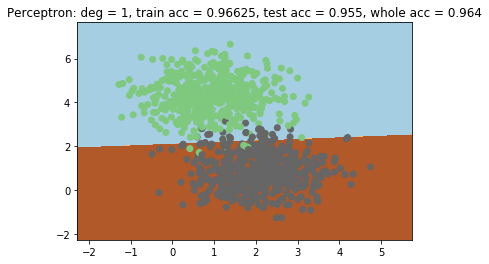

In [318]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import PolynomialFeatures

blobs2_X_biased = PolynomialFeatures(degree=1).fit_transform(blobs2_X)
blobs2_X_train_biased = PolynomialFeatures(degree=1).fit_transform(X_train_blobs2)
blobs2_X_test_biased = PolynomialFeatures(degree=1).fit_transform(X_test_blobs2)
clf = Perceptron(fit_intercept=False, max_iter=perceptron_epochs,
                 tol=1e-3, shuffle=False, random_state=0)
clf.fit(blobs2_X_train_biased, y_train_blobs2)
train_acc = clf.score(blobs2_X_train_biased, y_train_blobs2) 
test_acc = clf.score(blobs2_X_test_biased, y_test_blobs2) 
whole_acc = clf.score(blobs2_X_biased, blobs2_y)
draw_perceptron(blobs2_X_biased, blobs2_y, clf, train_acc, test_acc, whole_acc, 1)

In [319]:
class PerceptronPocket:
    def __init__(self, max_iter):
        self.epochs = max_iter
        self.w = None
        
    def score(self, X, y):
        return np.mean((self.predict(X) == y))
        
    def predict(self, X):
        return (X @ self.w > 0).astype(int)
    
    def fit(self, X_train, y_train, X_test, y_test):
        self.w = np.random.uniform(size=X_train.shape[1])
        best_w = None
        best_score = -1
        for epoch in range(self.epochs):
            for i in range(X_train.shape[0]):
                predicted = self.predict(X_train[i])
                y_apply = 1 if y_train[i] == 1 else -1
                if predicted != y_train[i]:
                    self.w += y_apply * X_train[i]
                    current_score = self.score(X_test, y_test)
                    if current_score > best_score:
                        best_w = np.copy(self.w)
        self.w = best_w

In [339]:
def learn_perceptron_for_certain_degree(degree, X_train, X_test, y_train, y_test):
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.model_selection import train_test_split
    X_train = PolynomialFeatures(degree=degree).fit_transform(X_train)
    X_test = PolynomialFeatures(degree=degree).fit_transform(X_test)
    X = np.vstack((X_train, X_test))
    y = np.hstack((y_train, y_test))
    
    np.random.seed(global_random_seed)
    my_clf = PerceptronPocket(max_iter=perceptron_epochs)
    my_clf.fit(X_train, y_train, X_test, y_test)
    train_acc = my_clf.score(X_train, y_train) 
    test_acc = my_clf.score(X_test, y_test) 
    whole_acc = my_clf.score(X, y)
    draw_perceptron(X, y, my_clf, train_acc, test_acc, whole_acc, degree)

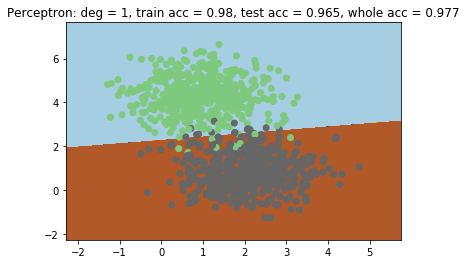

In [344]:
# 1 degree
learn_perceptron_for_certain_degree(1, X_train_blobs2, X_test_blobs2, y_train_blobs2, y_test_blobs2)

Looks better than sklearn. Order of magnitudes is the same.

3. (4 points) Add second-degree polynomial features to the dataset (x_1^2, x_2^2, x_1x_2), find the best perceptron hyperplane. Draw a projection of the hyperplane to the original two-dimensional space. Repeat for third- and fourth-degree polynomial features.

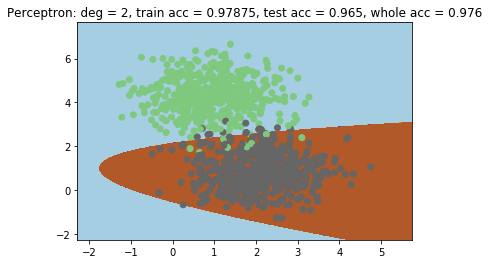

In [345]:
# 2 degree
learn_perceptron_for_certain_degree(2, X_train_blobs2, X_test_blobs2, y_train_blobs2, y_test_blobs2)

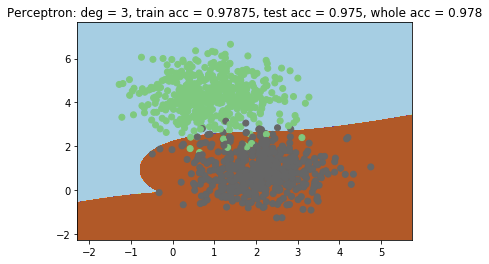

In [346]:
# 3 degree
learn_perceptron_for_certain_degree(3, X_train_blobs2, X_test_blobs2, y_train_blobs2, y_test_blobs2)

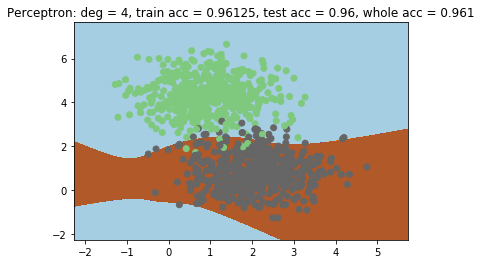

In [347]:
# 4 degree
learn_perceptron_for_certain_degree(4, X_train_blobs2, X_test_blobs2, y_train_blobs2, y_test_blobs2)

Looks like 3th degree is the best one in terms of test accuracy and whole accuracy.

# Logistic regression

Datasets: cancer.csv, spam.csv.

4. (4 points) Implement the logistic regression algorithm. Train it via the stochastic gradient descent and output draw the accuracy/iteration curve.

In [350]:
# spam.csv loading
spam_path = dataset_root + 'spam.csv'
spam_data = pd.read_csv(spam_path)
spam_data = spam_data.values
spam_X = spam_data[:, 0:-1].astype('float64')
spam_y = spam_data[:, -1]
from sklearn.preprocessing import PolynomialFeatures
spam_X = PolynomialFeatures(degree=1).fit_transform(spam_X)
print("spam datapoints shape: " + str(spam_X.shape))
print("spam labels shape: " + str(spam_y.shape))

spam datapoints shape: (4601, 58)
spam labels shape: (4601,)


In [351]:
# cancer.csv loading
cancer_path = dataset_root + 'cancer.csv'
cancer_data = pd.read_csv(cancer_path)
cancer_data = cancer_data.values
cancer_X = cancer_data[:, 1:].astype('float64')
cancer_y = cancer_data[:, 0]
from sklearn.preprocessing import PolynomialFeatures
cancer_X = PolynomialFeatures(degree=1).fit_transform(cancer_X)
print("cancer datapoints shape: " + str(cancer_X.shape))
print("cancer labels shape: " + str(cancer_y.shape))

cancer datapoints shape: (569, 31)
cancer labels shape: (569,)


Let's start with sklearn implementation to see the baseline accuracy.

In [419]:
from sklearn.linear_model import LogisticRegression

np.random.seed(global_random_seed)
logistic_clf_spam = LogisticRegression(
    fit_intercept=False, max_iter=perceptron_epochs, solver="liblinear",
    tol=1e-3, random_state=global_random_seed).fit(spam_X, spam_y)
spam_acc_sklearn = logistic_clf_spam.score(spam_X, spam_y)
print("Accuracy on spam for sklearn = " + str(spam_acc_sklearn))

Accuracy on spam for sklearn = 0.9311019343620952


In [357]:
from sklearn.linear_model import LogisticRegression

np.random.seed(global_random_seed)
logistic_clf_cancer = LogisticRegression(
    fit_intercept=False, max_iter=perceptron_epochs, solver="liblinear",
    tol=1e-3, random_state=global_random_seed).fit(cancer_X, cancer_y)
cancer_acc_sklearn = logistic_clf_cancer.score(cancer_X, cancer_y)
print("Accuracy on cancer for sklearn = " + str(cancer_acc_sklearn))

Accuracy on cancer for sklearn = 0.9578207381370826


In [496]:
class LogisticRegressionSGD:
    def __init__(self, max_iter, lr, batch_size):
        self.epochs = max_iter
        self.lr = lr
        self.batch_size = batch_size
        self.w = None
        from scipy.stats import logistic
        self.sigmoid = logistic.cdf
        self.user_labels = None 
        
    def score(self, X, y):
        return np.mean((self.predict(X) == y))
        
    def change_to_user_labels(self, y):
        y = np.copy(y).astype(object)
        y[y == -1] = self.user_labels[-1]
        y[y == 1] = self.user_labels[1]
        return y
    
    def change_to_minus_plus_labels(self, y):
        y = np.copy(y)
        y[y == self.user_labels[-1]] = -1
        y[y == self.user_labels[1]] = 1
        return y
    
    def predict(self, X):
        predicted = (self.sigmoid(X @ self.w) > 0.5).astype(int)
        predicted[predicted == 0] = -1
        return self.change_to_user_labels(predicted) 
    
    def fit(self, X, y):
        sorted_labels = np.sort(np.unique(y))
        if sorted_labels.shape != (2,):
            print("Only binary classification is supported!")
            return
        self.user_labels = {-1: sorted_labels[0], 1: sorted_labels[1]}
        user_y = y
        y = self.change_to_minus_plus_labels(y)
        np.random.seed(global_random_seed)
        self.w = np.zeros(X.shape[1])
        epoch_accuracies = []
        for epoch in range(self.epochs):
            batch_grad = 0
            for i in range(X.shape[0]): 
                #if i == 2:
                #    print(self.w)
                #    print(X[i])
                #    print(y[i] * self.w @ X[i])
                #    print(np.e ** (y[i] * self.w @ X[i]))
                #    return
                batch_grad += y[i] * X[i] / (1 + np.e ** (y[i] * self.w @ X[i]))
                if i % self.batch_size == 0 and i != 0:
                    self.w -= self.lr * (-1 / self.batch_size * batch_grad)
                    batch_grad = 0
            epoch_accuracies.append(self.score(X, user_y))
        return epoch_accuracies

In [515]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_spam_X = scaler.fit_transform(spam_X)
epoch_accuracies_spam = LogisticRegressionSGD(max_iter=perceptron_epochs, lr=0.1, batch_size=32).fit(scaled_spam_X, spam_y)

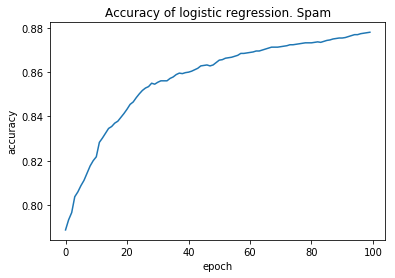

In [516]:
import matplotlib.pyplot as plt
plt.plot(np.arange(len(epoch_accuracies_spam)), epoch_accuracies_spam) 
plt.title('Accuracy of logistic regression. Spam')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

In [535]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_cancer_X = scaler.fit_transform(cancer_X)
epoch_accuracies_cancer = LogisticRegressionSGD(max_iter=perceptron_epochs, lr=0.1, batch_size=16).fit(scaled_cancer_X, cancer_y)

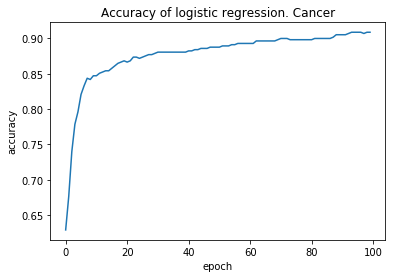

In [536]:
import matplotlib.pyplot as plt
plt.plot(np.arange(len(epoch_accuracies_cancer)), epoch_accuracies_cancer) 
plt.title('Accuracy of logistic regression. Cancer')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

# Neural networks

Datasets: mnist.csv, notMNIST.tar.gz

5. (2 points) Prepare the datasets so that every point is represented by a two-dimensional tensor.

Size of MNIST: 10000
Unique labels 10: [0 1 2 3 4 5 6 7 8 9]
10 image in mnist
Image size: torch.Size([1, 28, 28])
Label: tensor(9)


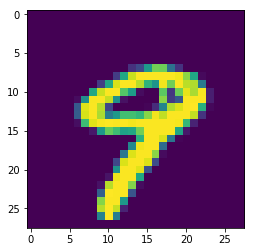

In [115]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
import torchvision.transforms as transforms

class MNIST(Dataset):
    IMAGE_SHAPE = (28, 28)
    
    def __init__(self, csv_filepath, transform=None):
        super().__init__()
        csv = pd.read_csv(csv_filepath)
        self.datapoints = torch.FloatTensor(csv.values[:, 1:].reshape(-1, MNIST.IMAGE_SHAPE[0], MNIST.IMAGE_SHAPE[1]))[:, None, :, :]
        self.transform = transform
        self.labels = torch.LongTensor(csv.values[:, 0])
    
    def __getitem__(self, index):
        datapoint = self.datapoints[index]
        if self.transform:
            datapoint = self.transform(datapoint)
        return datapoint, self.labels[index]

    def __len__(self):
        return self.labels.size()[0]
    
    def get_unique_labels(self):
        return np.unique(self.labels)

    
item_to_print = 10
# mnist = MNIST(dataset_root + 'mnist.csv', transforms.Compose([transforms.ToPILImage(), transforms.ToTensor()]))
# better without transformation
mnist = MNIST(dataset_root + 'mnist.csv')

print("Size of MNIST: " + str(len(mnist)))
print("Unique labels " + str(mnist.get_unique_labels().shape[0]) + ": " + str(mnist.get_unique_labels()))
print(str(item_to_print) + " image in mnist")
print("Image size: " + str(mnist[item_to_print - 1][0].shape))
print("Label: " + str(mnist[item_to_print - 1][1]))
plt.imshow(mnist[item_to_print - 1][0][0])

Looks like label corresponds to an image. Then dataset is probably loaded correctly.

Size of notMNIST: 18724
Unique labels 10: {'I', 'F', 'G', 'J', 'E', 'C', 'D', 'H', 'B', 'A'}
11 image in mnist
Image size: torch.Size([1, 28, 28])
Label: tensor(9), origin label: J


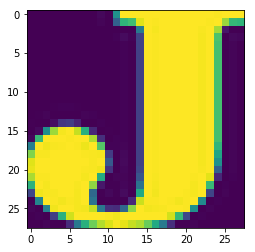

In [91]:
from skimage import io
import os
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
import torch

def change_str_labels(origin_labels):
    labels = np.copy(origin_labels)
    unique_labels = np.sort(np.unique(np.array(origin_labels)))
    for i in range(unique_labels.shape[0]):
        labels[labels == unique_labels[i]] = i
    return torch.LongTensor(labels.astype(float))

class notMNIST(Dataset):
    def __init__(self, root_path):
        super().__init__()
        self.origin_labels = []
        self.image_paths = []
        for label in os.listdir(root_path):
            for root, _, files in os.walk(os.path.join(root_path, label)):
                self.origin_labels.extend([label for _ in files])
                self.image_paths.extend([os.path.abspath(os.path.join(root, file)) for file in files])
        self.labels = change_str_labels(self.origin_labels)
        
    def __getitem__(self, index):
        return torch.FloatTensor(io.imread(self.image_paths[index]))[None, :, :], self.labels[index]

    def __len__(self):
        return len(self.labels)
    
    def get_origin_label(self, index):
        return self.origin_labels[index]
    
    def get_unique_labels(self):
        return set(self.origin_labels)

item_to_print = 11
notMnist = notMNIST(dataset_root + 'notMNIST_small')
print("Size of notMNIST: " + str(len(notMnist)))
print("Unique labels " + str(len(notMnist.get_unique_labels())) + ": " + str(notMnist.get_unique_labels()))
print(str(item_to_print) + " image in mnist")
print("Image size: " + str(notMnist[item_to_print - 1][0].shape))
print("Label: " + str(notMnist[item_to_print - 1][1]) + ", origin label: " +
      str(notMnist.get_origin_label(item_to_print - 1)))
plt.imshow(notMnist[item_to_print - 1][0][0])

Looks like J. Correct.

6. (4 points) Create a neural network that consists out of three convolutional layers with 8 3x3 filters each and two fully-connected layers with 64 neurons each. Train the network on the mnist dataset with three different types of activation functions (sigmoid, tanh, ReLU).

In [119]:
import torch.nn as nn

def apply_if_not_none(f, data):
    return data if f is None else f(data)

class Net(nn.Module):

    def __init__(self, nonlins):
        super(Net, self).__init__()
        self.nonlins = nonlins
        self.conv1 = nn.Conv2d(1, 8, 3)
        self.conv2 = nn.Conv2d(8, 8, 3)
        self.conv3 = nn.Conv2d(8, 8, 3)
        size_of_conv_image = (((28 - 3 + 1) - 3 + 1) - 3 + 1)
        self.fc1 = nn.Linear(8 * size_of_conv_image * size_of_conv_image, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = apply_if_not_none(self.nonlins[0], self.conv1(x))
        x = apply_if_not_none(self.nonlins[1], self.conv2(x))
        x = apply_if_not_none(self.nonlins[2], self.conv3(x))
        x = x.view(-1, self.num_flat_features(x))
        x = apply_if_not_none(self.nonlins[3], self.fc1(x))
        x = apply_if_not_none(self.nonlins[4], self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [137]:
import torch
import torch.nn as nn
import torch.optim as optim

def train_model(model, dataset, config):
    from torch.utils.data import DataLoader
    from tqdm import tqdm_notebook as tqdm
    
    criterion = config['criterion']()
    optimizer = config['optimizer'](model.parameters(), lr=config['lr'])

    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

    trainloader = DataLoader(
        train_dataset,
        batch_size=config['batch_size'], shuffle=config['shuffle'], num_workers=3
    )
    valloader = DataLoader(
        val_dataset,
        batch_size=config['batch_size'], num_workers=3
    )
    
    print("                         TRAIN     VALIDATION")
    train_acc = score_model(model, trainloader) if config['validate_on_train'] else "-"
    val_acc = score_model(model, valloader)
    print("Initial accuracy: " + str(train_acc) + "   " + str(val_acc))
    for epoch in range(config['epochs']):
        for inputs, labels in trainloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        train_acc = score_model(model, trainloader) if config['validate_on_train'] else "-"
        val_acc = score_model(model, valloader)
        print("Accuracy on epoch " + str(epoch) + " / " + str(config['epochs']) + ": " + str(train_acc) + "   " + str(val_acc))

def score_model(model, dataloader):
    from tqdm import tqdm_notebook as tqdm
    
    correct = 0
    total = 0
    with torch.no_grad():
        for features, labels in dataloader:
            outputs = model(features)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    return accuracy

In [138]:
def conduct_experiment_with_different_non_linear_functions(nonlin):
    torch.manual_seed(global_random_seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(global_random_seed)

    config = {
        'epochs': 10,
        'batch_size': 32,
        'criterion': nn.CrossEntropyLoss,
        'optimizer': optim.SGD,
        'lr': 0.01,
        'momentum': 0.9,
        'shuffle': True,
        'validate_on_train': True
    }
    model = Net(nonlin)
    train_model(model, mnist, config)

In [139]:
import torch.nn as nn

print("Sigmoid")
nonlins = [None, None, None, nn.Sigmoid(), nn.Sigmoid()]
conduct_experiment_with_different_non_linear_functions(nonlins)

Sigmoid
                         TRAIN     VALIDATION
Initial accuracy: 0.103875   0.1005
Accuracy on epoch 0 / 10: 0.71775   0.704
Accuracy on epoch 1 / 10: 0.781   0.7595
Accuracy on epoch 2 / 10: 0.77775   0.7555
Accuracy on epoch 3 / 10: 0.80275   0.783
Accuracy on epoch 4 / 10: 0.796375   0.773
Accuracy on epoch 5 / 10: 0.81725   0.79
Accuracy on epoch 6 / 10: 0.84575   0.8195
Accuracy on epoch 7 / 10: 0.856125   0.831
Accuracy on epoch 8 / 10: 0.85475   0.834
Accuracy on epoch 9 / 10: 0.867875   0.844


In [140]:
import torch.nn as nn

print("Tanh")
nonlins = [nn.Tanh() for i in range(5)]
conduct_experiment_with_different_non_linear_functions(nonlins)

Tanh
                         TRAIN     VALIDATION
Initial accuracy: 0.098625   0.097
Accuracy on epoch 0 / 10: 0.764125   0.755
Accuracy on epoch 1 / 10: 0.88325   0.87
Accuracy on epoch 2 / 10: 0.909375   0.895
Accuracy on epoch 3 / 10: 0.92675   0.912
Accuracy on epoch 4 / 10: 0.939875   0.9205
Accuracy on epoch 5 / 10: 0.946625   0.925
Accuracy on epoch 6 / 10: 0.9535   0.9305
Accuracy on epoch 7 / 10: 0.963375   0.9395
Accuracy on epoch 8 / 10: 0.968875   0.942
Accuracy on epoch 9 / 10: 0.972625   0.9455


In [141]:
import torch.nn as nn

print("ReLU")
nonlins = [nn.ReLU() for i in range(5)]
conduct_experiment_with_different_non_linear_functions(nonlins)

ReLU
                         TRAIN     VALIDATION
Initial accuracy: 0.13125   0.122
Accuracy on epoch 0 / 10: 0.96525   0.942
Accuracy on epoch 1 / 10: 0.9825   0.9545
Accuracy on epoch 2 / 10: 0.98475   0.954
Accuracy on epoch 3 / 10: 0.988875   0.9595
Accuracy on epoch 4 / 10: 0.994625   0.964
Accuracy on epoch 5 / 10: 0.999375   0.965
Accuracy on epoch 6 / 10: 0.997125   0.9675
Accuracy on epoch 7 / 10: 0.999375   0.968
Accuracy on epoch 8 / 10: 0.984375   0.946
Accuracy on epoch 9 / 10: 0.99975   0.9665


Looks like ReLU is the best one. Tanh good. Sigmoid is applied only for linear transformations because experiment for each layer showed very poor results (acc = 1%).

7. (3 points) Reach an accuracy of 90% on the notMNIST test dataset. All techniques are permitted.

Firstly, let's prepare our dataset. We need to split it on train/test (80/20).

Test will be the data where we need to reach 90 and 95 accuracies.

This data won't be used for hyperparameters fitting.

Train will be splitted again on val and train in propotion 80/20.

In [144]:
torch.manual_seed(global_random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(global_random_seed)

notMnist_train, notMnist_test = torch.utils.data.random_split(notMnist, [int(0.8 * len(notMnist)), len(notMnist) - int(0.8 * len(notMnist))])
print("Size of notMnist train/test: " + str(len(notMnist_train)) + "/" + str(len(notMnist_test)))

Size of notMnist train/test: 14979/3745


In [150]:
torch.manual_seed(global_random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(global_random_seed)

config = {
    'epochs': 8,
    'batch_size': 32,
    'criterion': nn.CrossEntropyLoss,
    'optimizer': optim.SGD,
    'lr': 0.01,
    'momentum': 0.9,
    'shuffle': True,
    'validate_on_train': True
}
nonlins = [nn.ReLU() for i in range(5)]
model = Net(nonlins)
train_model(model, notMnist_train, config)

print("---FINAL TEST ON test dataset---")
from torch.utils.data import DataLoader
notMnist_test_dataloader = DataLoader(
        notMnist_test,
        batch_size=config['batch_size'], num_workers=3
)
print("accuracy of the network: " + str(score_model(model, notMnist_test_dataloader)))

                         TRAIN     VALIDATION
Initial accuracy: 0.11007260285404323   0.10313751668891856
Accuracy on epoch 0 / 8: 0.9020278728198281   0.8875166889185581
Accuracy on epoch 1 / 8: 0.9092047066677793   0.8855140186915887
Accuracy on epoch 2 / 8: 0.9465910039222232   0.9138851802403204
Accuracy on epoch 3 / 8: 0.9578569640323792   0.9158878504672897
Accuracy on epoch 4 / 8: 0.9669531836768755   0.9062082777036048
Accuracy on epoch 5 / 8: 0.9727947926228824   0.914886515353805
Accuracy on epoch 6 / 8: 0.982558624718351   0.9152202937249666
Accuracy on epoch 7 / 8: 0.9784694984561462   0.914218958611482
---FINAL TEST ON test dataset---
accuracy of the network: 0.914018691588785


Actually no hyperparameters search was conducted. Default parameters fit well.

8. (3 points) Reach an accuracy of 95% on the notMNIST test dataset. All techniques are permitted.